In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import scipy



In [2]:
!pip install gensim

In [3]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.5 MB/s eta 0:00:00


In [4]:
df1=pd.read_csv("/content/data.csv")

In [5]:
df1.head()

URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singer Jason Aldean, who was performin...      1

In [6]:
from urllib.parse import urlparse
df1['source_url'] = ''

# Iterate over each row in the DataFrame
for index, row in df1.iterrows():
    url = row['URLs']
    parsed_url = urlparse(url)
    source_url = parsed_url.netloc
    df1.at[index, 'source_url'] = source_url

# Print the updated DataFrame
df1

URLs  \
0     http://www.bbc.com/news/world-us-canada-414191...   
1     https://www.reuters.com/article/us-filmfestiva...   
2     https://www.nytimes.com/2017/10/09/us/politics...   
3     https://www.reuters.com/article/us-mexico-oil-...   
4     http://www.cnn.com/videos/cnnmoney/2017/10/08/...   
...                                                 ...   
4004  http://beforeitsnews.com/sports/2017/09/trends...   
4005  http://beforeitsnews.com/u-s-politics/2017/10/...   
4006  https://www.activistpost.com/2017/09/ron-paul-...   
4007  https://www.reuters.com/article/us-china-pharm...   
4008  http://beforeitsnews.com/u-s-politics/2017/10/...   

                                               Headline  \
0            Four ways Bob Corker skewered Donald Trump   
1     Linklater's war veteran comedy speaks to moder...   
2     Trump’s Fight With Corker Jeopardizes His Legi...   
3     Egypt's Cheiron wins tie-up with Pemex for Mex...   
4           Jason Aldean opens 'SNL' with Vegas tribute   
...                                                 ...   
4004                                    Trends to Watch   
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...   
4006        Ron Paul on Trump, Anarchism & the AltRight   
4007  China to accept overseas trial data in bid to ...   
4008  Vice President Mike Pence Leaves NFL Game Beca...   

                                                   Body  Label  \
0     Image copyright Getty Images\nOn Sunday mornin...      1   
1     LONDON (Reuters) - “Last Flag Flying”, a comed...      1   
2     The feud broke into public view last week when...      1   
3     MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1   
4     Country singer Jason Aldean, who was performin...      1   
...                                                 ...    ...   
4004  Trends to Watch\n% of readers think this story...      0   
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...      0   
4006                                                NaN      0   
4007  SHANGHAI (Reuters) - China said it plans to ac...      1   
4008  Vice President Mike Pence Leaves NFL Game Beca...      0   

                source_url  
0              www.bbc.com  
1          www.reuters.com  
2          www.nytimes.com  
3          www.reuters.com  
4              www.cnn.com  
...                    ...  
4004     beforeitsnews.com  
4005     beforeitsnews.com  
4006  www.activistpost.com  
4007       www.reuters.com  
4008     beforeitsnews.com  

[4009 rows x 5 columns]

In [7]:
df1['URLs']

0       http://www.bbc.com/news/world-us-canada-414191...
1       https://www.reuters.com/article/us-filmfestiva...
2       https://www.nytimes.com/2017/10/09/us/politics...
3       https://www.reuters.com/article/us-mexico-oil-...
4       http://www.cnn.com/videos/cnnmoney/2017/10/08/...
                              ...                        
4004    http://beforeitsnews.com/sports/2017/09/trends...
4005    http://beforeitsnews.com/u-s-politics/2017/10/...
4006    https://www.activistpost.com/2017/09/ron-paul-...
4007    https://www.reuters.com/article/us-china-pharm...
4008    http://beforeitsnews.com/u-s-politics/2017/10/...
Name: URLs, Length: 4009, dtype: object

In [8]:
df1.isnull().sum()

URLs           0
Headline       0
Body          21
Label          0
source_url     0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URLs        4009 non-null   object
 1   Headline    4009 non-null   object
 2   Body        3988 non-null   object
 3   Label       4009 non-null   int64 
 4   source_url  4009 non-null   object
dtypes: int64(1), object(4)
memory usage: 156.7+ KB


In [10]:
df1=df1.dropna()

In [11]:
df1 = df1.reset_index(drop=True)


In [12]:
df1.shape

(3988, 5)

Exploratory Data analysis

In [13]:
real_order=df1[df1['Label']==1]['source_url'].value_counts().sort_values(ascending=False).index

<ipython-input-14-289ffb8659e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(y='source_url', data=df1[df1['Label']==1],order=real_order,palette='summer')


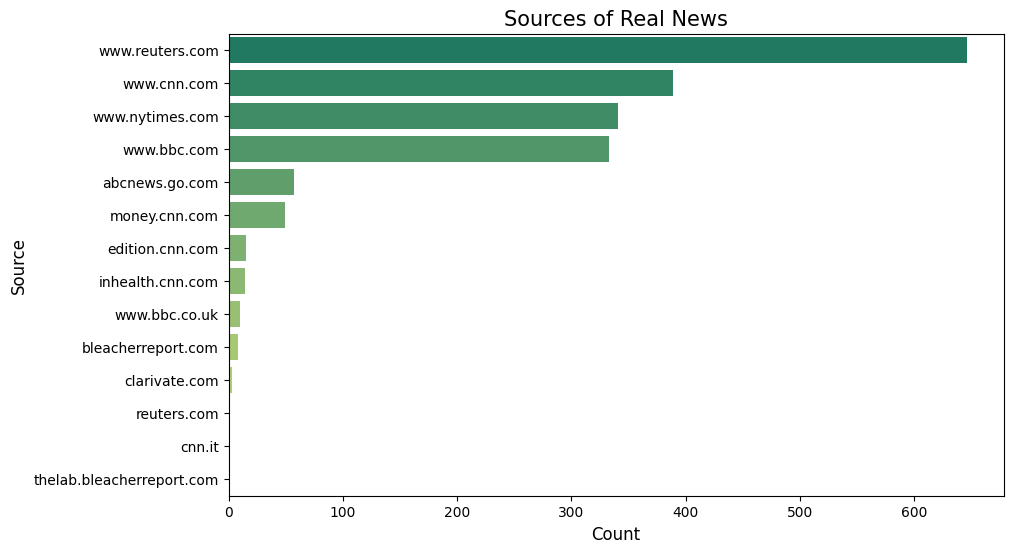

In [14]:
plt.figure(figsize=(10,6))
sn.countplot(y='source_url', data=df1[df1['Label']==1],order=real_order,palette='summer')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Real News',fontsize=15)
plt.show()

In [15]:
fake_order=df1[df1['Label']==0]['source_url'].value_counts().sort_values(ascending=False).index

<ipython-input-16-11a6c9fea122>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(y='source_url', data=df1[df1['Label']==0],order=fake_order,palette='autumn')


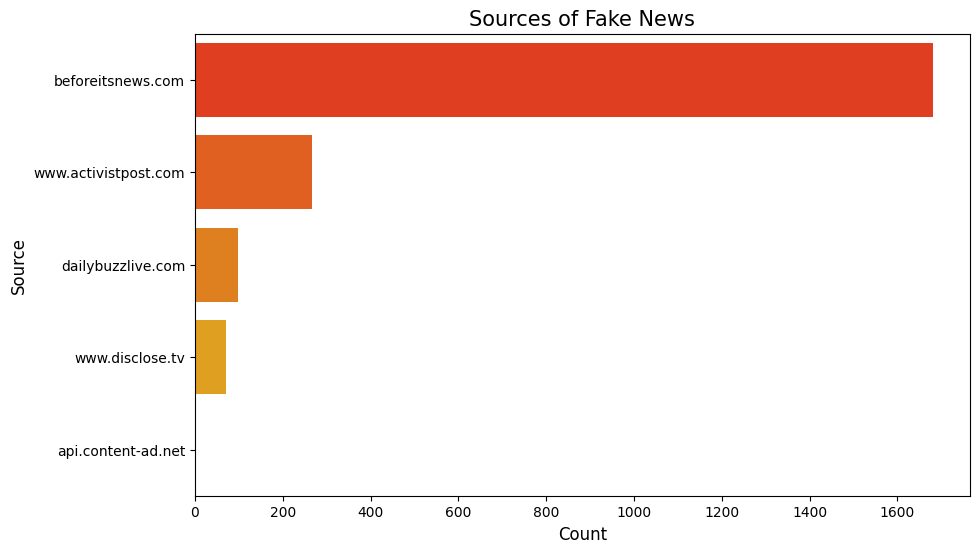

In [16]:
plt.figure(figsize=(10,6))
sn.countplot(y='source_url', data=df1[df1['Label']==0],order=fake_order,palette='autumn')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Fake News',fontsize=15)
plt.show()

In [17]:
real_counts = df1['Label'].value_counts()
real_counts

Label
0    2120
1    1868
Name: count, dtype: int64

In [18]:
new=[]
for x in df1[df1['Label']==1]['source_url'].unique():
    if x in df1[df1['Label']==0]['source_url'].unique():
        new.append(x)
print(new)

[]


In [19]:
df1['Body']=df1['Body'].str.lower()
df1['Headline']=df1['Headline'].str.lower()


In [20]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
corpus=[]
new= df1['Headline'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

In [22]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

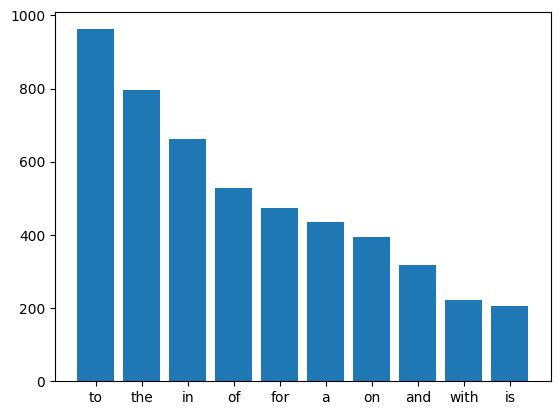

In [23]:
plot_top_stopwords_barchart(df1['Headline'])

In [24]:
from collections import Counter
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    stop.add("&")
    stop.add("-")
    stop.add("says")
    stop.add("5")
    stop.add("said")
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sn.barplot(x=y,y=x)

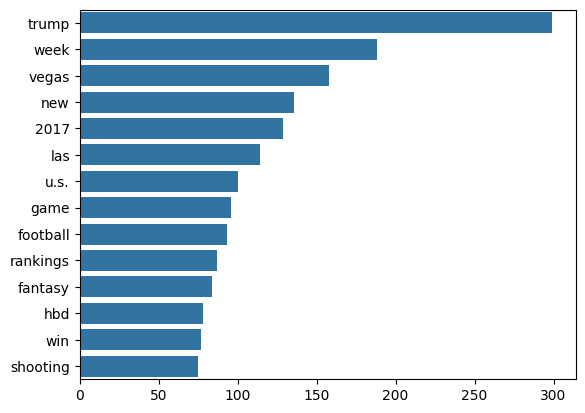

In [25]:
plot_top_non_stopwords_barchart(df1['Headline'])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


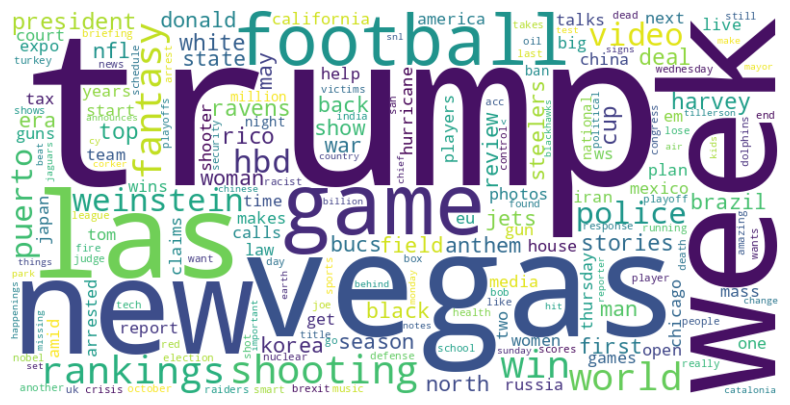

In [26]:
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
additional_stopwords = ['said', 'also', 'even','take','us','could','says','would','many']
stop_words.update(additional_stopwords)
# Tokenize the text
combined_text = ' '.join(df1['Headline'])
tokens = word_tokenize(combined_text)
# Remove stopwords and other unimportant words
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Generate word frequencies
word_frequencies = nltk.FreqDist(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [27]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [28]:
def preprocessing(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['Body']:
        words=[w for w in word_tokenize(news) if (w not in stop_words)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus=preprocessing(df1)

In [29]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [30]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.012*"game" + 0.007*"week" + 0.007*"season" + 0.006*"team" + 0.005*"play" + 0.005*"first" + 0.005*"two" + 0.005*"yard" + 0.005*"one" + 0.004*"time"'),
 (1,
  '0.007*"trump" + 0.006*"state" + 0.005*"president" + 0.004*"year" + 0.004*"new" + 0.003*"government" + 0.003*"mr." + 0.003*"u.s." + 0.003*"time" + 0.003*"one"'),
 (2,
  '0.005*"one" + 0.004*"people" + 0.003*"time" + 0.003*"paddock" + 0.003*"year" + 0.003*"fire" + 0.003*"two" + 0.003*"news" + 0.003*"http" + 0.003*"vega"'),
 (3,
  '0.005*"new" + 0.004*"one" + 0.004*"year" + 0.004*"like" + 0.004*"time" + 0.003*"content" + 0.003*"weinstein" + 0.003*"company" + 0.003*"people" + 0.003*"mr."')]

In [31]:
import pyLDAvis
from pyLDAvis import gensim

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,bow_corpus,dic)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
df1['Body1']=preprocessing(df1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
df1['Body'][25]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'(reuters) - maria sharapova overpowered poland’s magda linette to enter the quarter-finals of the tianjin open on thursday and is targeting a first title since returning from a 15-month doping ban.\nthe former world number one prevailed 7-5, 6-3 and will make her first quarter-finals appearance since stuttgart in april, where she lost to kristina mladenovic in the next round.\nsharapova, who was beaten by simona halep in the third round of the china open last week, took a 4-3 lead in the first set before linette hit back. but sharapova broke her rival in the 12th game to take a 1-0 lead.\nranked 15 places below world number 71 linette because of her absence from the tour, the 30-year-old russian appeared in control in the next set despite conceding an early break.\nthe five-times grand slam champion broke back twice and held on to set up a clash with swiss qualifier stefanie vogele who beat yulia putintseva 6-2 6-3.\nmeanwhile, defending champion peng shuai beat compatriot wang xiyu 6

In [35]:
df1['Body1']
df1['preprocessed_text'] = [' '.join(tokens) for tokens in df1['Body1']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
df1['preprocessed_text'][25]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'reuters maria sharapova overpowered poland magda linette enter quarter-finals tianjin open thursday targeting first title since returning 15-month doping ban former world number one prevailed 7-5 6-3 make first quarter-finals appearance since stuttgart april lost kristina mladenovic next round sharapova beaten simona halep third round china open last week took 4-3 lead first set linette hit back sharapova broke rival 12th game 1-0 lead ranked place world number linette absence tour 30-year-old russian appeared control next set despite conceding early break five-times grand slam champion broke back twice held set clash swiss qualifier stefanie vogele beat yulia putintseva 6-2 6-3. meanwhile defending champion peng shuai beat compatriot wang xiyu 6-2 6-2 sara errani got past brazilian beatriz haddad maia 6-4 4-6 6-3'

In [38]:
df1['title_length']=df1['Headline'].apply(lambda x: len(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


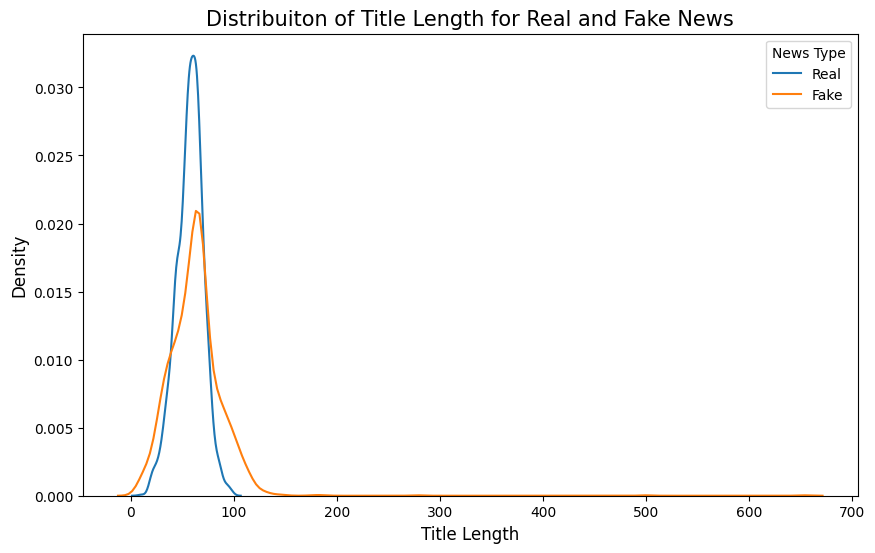

In [39]:
plt.figure(figsize=(10,6))
sn.kdeplot(df1[df1['Label']==1]['title_length'])
sn.kdeplot(df1[df1['Label']==0]['title_length'])
plt.xlabel('Title Length',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.legend(title='News Type',fontsize=10,labels=['Real','Fake'])
plt.title('Distribuiton of Title Length for Real and Fake News',fontsize=15)
plt.show()

In [40]:
df1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         four ways bob corker skewered donald trump   
1  linklater's war veteran comedy speaks to moder...   
2  trump’s fight with corker jeopardizes his legi...   
3  egypt's cheiron wins tie-up with pemex for mex...   
4        jason aldean opens 'snl' with vegas tribute   

                                                Body  Label       source_url  \
0  image copyright getty images\non sunday mornin...      1      www.bbc.com   
1  london (reuters) - “last flag flying”, a comed...      1  www.reuters.com   
2  the feud broke into public view last week when...      1  www.nytimes.com   
3  mexico city (reuters) - egypt’s cheiron holdin...      1  www.reuters.com   
4  country singer jason aldean, who was performin...      1      www.cnn.com   

                                               Body1  \
0  [image, copyright, getty, image, sunday, morni...   
1  [london, reuters, last, flag, flying, comedy-d...   
2  [feud, broke, public, view, last, week, mr., c...   
3  [mexico, city, reuters, egypt, cheiron, holdin...   
4  [country, singer, jason, aldean, performing, l...   

                                   preprocessed_text  title_length  
0  image copyright getty image sunday morning don...            42  
1  london reuters last flag flying comedy-drama v...            66  
2  feud broke public view last week mr. corker mr...            60  
3  mexico city reuters egypt cheiron holding limi...            68  
4  country singer jason aldean performing la vega...            43

In [41]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
card_docs = [TaggedDocument(doc.split(' '), [i])
             for i, doc in enumerate(df1['preprocessed_text'])]
#display the tagged docs
card_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[TaggedDocument(words=['image', 'copyright', 'getty', 'image', 'sunday', 'morning', 'donald', 'trump', 'went', 'twitter', 'tirade', 'member', 'party', "n't", 'exactly', 'huge', 'news', 'far', 'first', 'time', 'president', 'turned', 'rhetorical', 'cannon', 'rank', 'time', 'however', 'attack', 'particularly', 'biting', 'personal', 'essentially', 'called', 'tennessee', 'senator', 'bob', 'corker', 'chair', 'powerful', 'senate', 'foreign', 'relation', 'committee', 'coward', 'running', 're-election', 'corker', 'begged', 'president', 'endorsement', 'refused', 'give', 'wrongly', 'claimed', 'corker', 'support', 'iranian', 'nuclear', 'agreement', 'political', 'accomplishment', 'unlike', 'colleague', 'corker', 'free', 'worry', 'immediate', 'political', 'future', "n't", 'hold', 'tongue', 'skip', 'twitter', 'post', 'senbobcorker', 'shame', 'white', 'house', 'become', 'adult', 'day', 'care', 'center', 'someone', 'obviously', 'missed', 'shift', 'morning', 'senator', 'bob', 'corker', 'senbobcorker', '

In [43]:
model = Doc2Vec(vector_size=64, min_count=1, epochs = 20)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
model = Doc2Vec(vector_size=64, window=2, min_count=1, workers=8, epochs = 40)
#build vocab
model.build_vocab(card_docs)
#train model
model.train(card_docs, total_examples=model.corpus_count
            , epochs=model.epochs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
card2vec = [model.infer_vector((df1['preprocessed_text'][i].split(' ')))
            for i in range(0,len(df1['preprocessed_text']))]
card2vec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[array([ 0.4913573 ,  0.5199187 ,  0.5621139 ,  2.6477032 ,  0.77053565,
        -0.8642965 , -1.6210622 , -1.0258045 , -0.786846  , -1.855187  ,
         0.7447672 ,  1.0206094 , -3.4726954 , -0.8752396 ,  2.5824153 ,
         0.78275305,  0.6223229 , -0.7505669 ,  1.8471506 ,  3.1836486 ,
         1.0039017 , -0.38773572, -1.9990788 ,  0.3516164 ,  0.80265486,
         0.04266011, -2.183814  , -1.2268833 ,  0.9908981 , -0.25330865,
        -0.0830022 ,  1.0129602 , -1.621834  , -1.241393  ,  3.5591085 ,
        -1.3566513 ,  1.2891256 ,  0.29224458, -1.7703472 , -0.37944415,
         0.12086896, -0.12670733,  0.74157655, -1.0683826 , -0.22359912,
        -0.06603692,  3.3464475 , -0.06674495,  3.1474903 ,  0.05386525,
         1.9729137 , -1.0995518 ,  1.1020157 , -1.3313069 ,  0.74117196,
        -0.19818597, -1.9895577 ,  1.7723048 , -1.8287379 , -0.6149004 ,
        -0.3450306 , -0.09377601,  0.23437192, -0.23249145], dtype=float32),
 array([ 0.9252927 , -1.8806837 ,  1.0027738 , 

In [46]:
dtv= np.array(card2vec).tolist()
#set list to dataframe column
df1['doc2vec'] = dtv
df1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         four ways bob corker skewered donald trump   
1  linklater's war veteran comedy speaks to moder...   
2  trump’s fight with corker jeopardizes his legi...   
3  egypt's cheiron wins tie-up with pemex for mex...   
4        jason aldean opens 'snl' with vegas tribute   

                                                Body  Label       source_url  \
0  image copyright getty images\non sunday mornin...      1      www.bbc.com   
1  london (reuters) - “last flag flying”, a comed...      1  www.reuters.com   
2  the feud broke into public view last week when...      1  www.nytimes.com   
3  mexico city (reuters) - egypt’s cheiron holdin...      1  www.reuters.com   
4  country singer jason aldean, who was performin...      1      www.cnn.com   

                                               Body1  \
0  [image, copyright, getty, image, sunday, morni...   
1  [london, reuters, last, flag, flying, comedy-d...   
2  [feud, broke, public, view, last, week, mr., c...   
3  [mexico, city, reuters, egypt, cheiron, holdin...   
4  [country, singer, jason, aldean, performing, l...   

                                   preprocessed_text  title_length  \
0  image copyright getty image sunday morning don...            42   
1  london reuters last flag flying comedy-drama v...            66   
2  feud broke public view last week mr. corker mr...            60   
3  mexico city reuters egypt cheiron holding limi...            68   
4  country singer jason aldean performing la vega...            43   

                                             doc2vec  
0  [0.49135729670524597, 0.51991868019104, 0.5621...  
1  [0.9252926707267761, -1.8806836605072021, 1.00...  
2  [2.5621299743652344, 1.636633038520813, -2.122...  
3  [1.419709324836731, -0.24873371422290802, 2.08...  
4  [1.1069867610931396, 0.510262131690979, 0.5852...

In [89]:

X_train, X_test, y_train, y_test = train_test_split(df1['doc2vec'], df1['Label'], test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
X_train.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3190,)

In [91]:
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_2d)
X_test = scaler.transform(X_test_2d)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
from sklearn.svm import SVC
classifier=SVC()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVC()

In [95]:
predictions3=classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


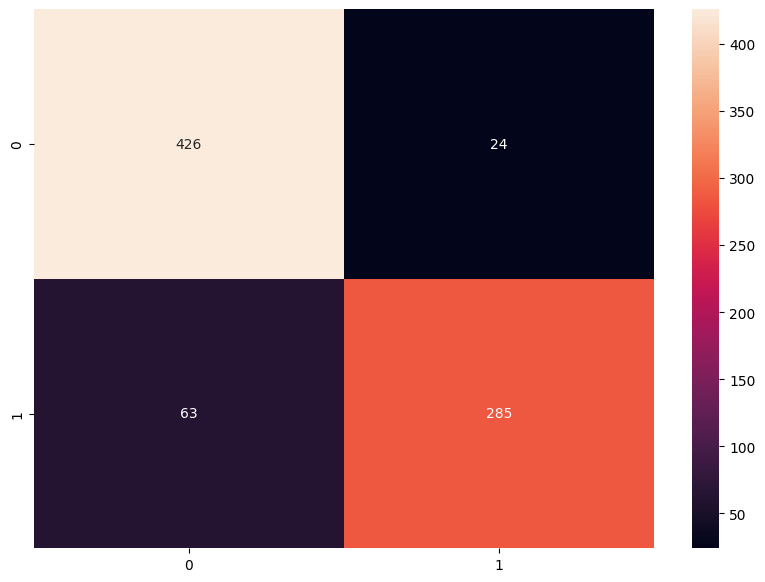



              precision    recall  f1-score   support

           0       0.87      0.95      0.91       450
           1       0.92      0.82      0.87       348

    accuracy                           0.89       798
   macro avg       0.90      0.88      0.89       798
weighted avg       0.89      0.89      0.89       798



In [96]:
cm=confusion_matrix(y_test, predictions3)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.show()
print('\n')
print(classification_report(y_test, predictions3))

In [97]:
accuracy_svc = accuracy_score(y_test, predictions3) # Call the accuracy_score function directly


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
model=PassiveAggressiveClassifier()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PassiveAggressiveClassifier()

In [100]:
pred=model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       450
           1       0.94      0.72      0.81       348

    accuracy                           0.86       798
   macro avg       0.88      0.84      0.85       798
weighted avg       0.87      0.86      0.85       798



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
accuracy_pac = accuracy_score(y_test, pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


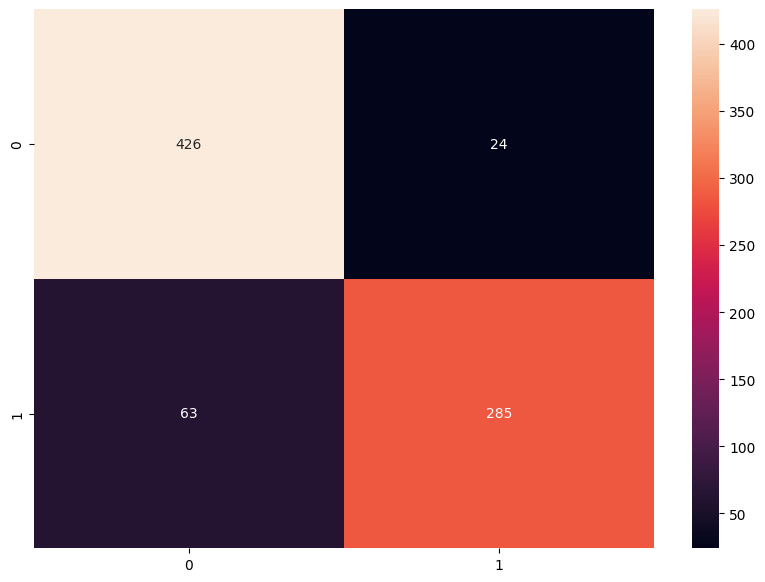

In [103]:
cm1=confusion_matrix(y_test, pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.show()

In [104]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(n_estimators=100, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
random_forest_model.fit(X_train, y_train)

# Make predictions
pred =random_forest_model.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.92      0.87      0.89       450
           1       0.84      0.90      0.87       348

    accuracy                           0.88       798
   macro avg       0.88      0.88      0.88       798
weighted avg       0.88      0.88      0.88       798



In [106]:
accuracy_RF = accuracy_score(y_test, pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


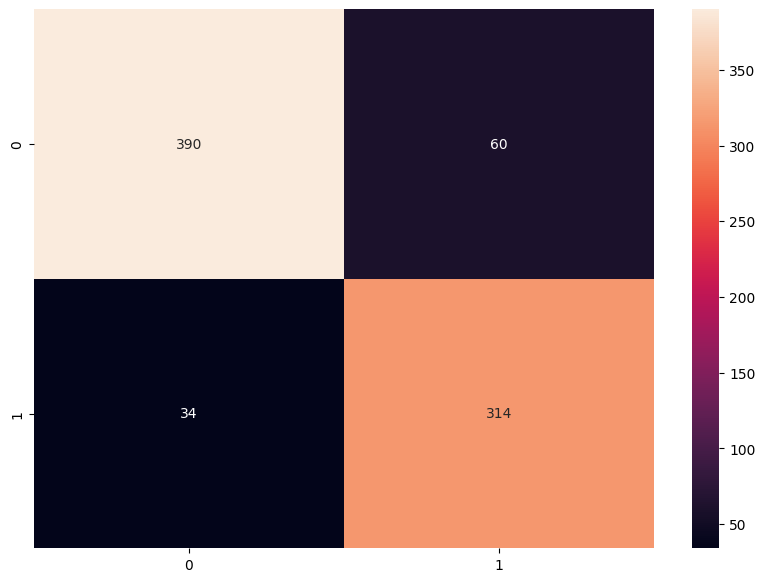

In [107]:
cm1=confusion_matrix(y_test, pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


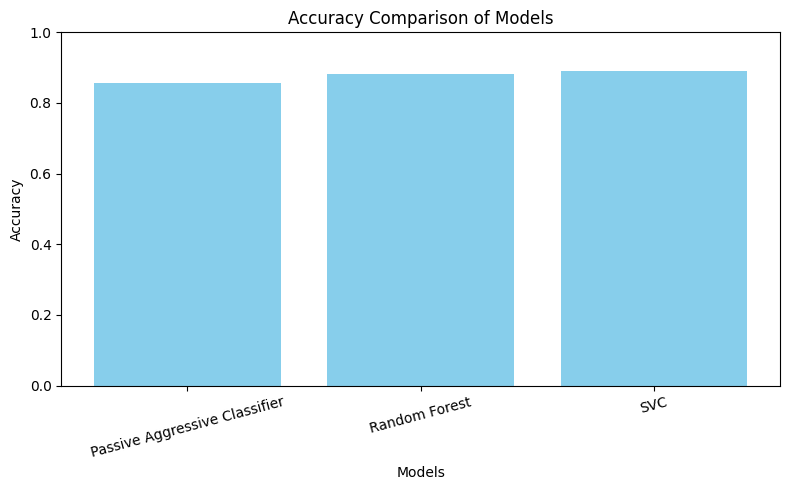

In [110]:
models = ['Passive Aggressive Classifier', 'Random Forest', 'SVC']
accuracies = [accuracy_pac, accuracy_RF, accuracy_svc]

# Plot the bar graph
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)  # Focus on accuracy range
plt.xticks(rotation=15)

# Show the graph
plt.tight_layout()
plt.show()